In [1]:
from plotdelice.graphs import violinplot_delice, barplot_delice
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imaris_ims_file_reader.ims import ims
import os
import seaborn as sns
import random
from tabulate import tabulate
from scipy import stats
import math

In [2]:

def calculate_angle(x1, y1, x2, y2):
    # calculate between x-axis and segment
    x1 = np.abs(x1)
    x2 = np.abs(x2)
    y1 = np.abs(y1)
    y2 = np.abs(y2)
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle_rad = math.atan2(delta_y, delta_x)
    angle_deg = math.degrees(angle_rad)
    return np.abs(angle_deg)



# Chevron angle


In [3]:
import os
import pandas as pd

# Load data
path = '/Users/quillan/Documents/Lab/Thesis/Chevron Analysis/Somites_angles/'
somites = pd.DataFrame()  # Initialize an empty DataFrame
for file in os.listdir(path):
    if file.endswith('csv'):
        df = pd.read_csv(os.path.join(path, file))
        df['genotype'] = file.split('_')[0]
        df['name'] = file
        # Append the current DataFrame (df) to the list of DataFrames
        somites = pd.concat([somites, df], ignore_index=True)

In [4]:
angles = pd.DataFrame({"name": somites["name"], "genotype": somites["genotype"], "angle": np.nan,"somite": somites["index"]})

# Iterate through unique fish indices
for fish in np.unique(somites['name']):
    #print(fish)
    for somite in np.unique(somites["index"][somites['name']==fish]):   # iterate of every somite in the fish
        #print(fish, df["treat"][df["index"] == fish].iloc[0])
        #print("somite: ",somite)
        y0 = 0
        x0 = 0
        x = (somites["axis-1"][(somites["index"] == somite) & (somites["name"] == fish)] - x0)# *pixel_size
        y = (somites["axis-0"][(somites["index"] == somite) & (somites["name"] == fish)] - y0)# *pixel_size
        #print(x)
        angle = calculate_angle(x.iloc[1], y.iloc[1], x.iloc[0], y.iloc[0])-calculate_angle(x.iloc[-1], y.iloc[-1], x.iloc[1], y.iloc[1])
        #angles["angle"][(angles["name"] == fish)] = angle
        
        angles.loc[((angles["name"] == fish)&(angles["somite"] == somite)),"angle"] = np.abs(angle)

In [5]:
angles = angles.drop_duplicates()
angles.head()

,name,genotype,angle,somite
0,Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv,Cc2d2a,89.041595,0
3,Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv,Cc2d2a,98.138771,1
6,Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv,Cc2d2a,88.592075,2
9,Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv,Cc2d2a,87.305118,3
12,Cc2d2a_2dpf_4D9-488_DAPI_2024-04-19_F3.ims.csv,Cc2d2a,91.665121,4


    Cc2d2a mean:                             83.45712018628144
    Inpp5e mean:                              78.4895605350691
        WT mean:                             82.30159211405048
Cc2d2a 83.45712018628144 x WT 83.45712018628144              padj: 1.5002692711601733  p-val: 0.5000897570533911
Cc2d2a 83.45712018628144 x Inpp5e 83.45712018628144              padj: 0.0022141754992900894  p-val: 0.0007380584997633632
Inpp5e 78.4895605350691 x WT 78.4895605350691               padj: 0.004828798505456598  p-val: 0.001609599501818866


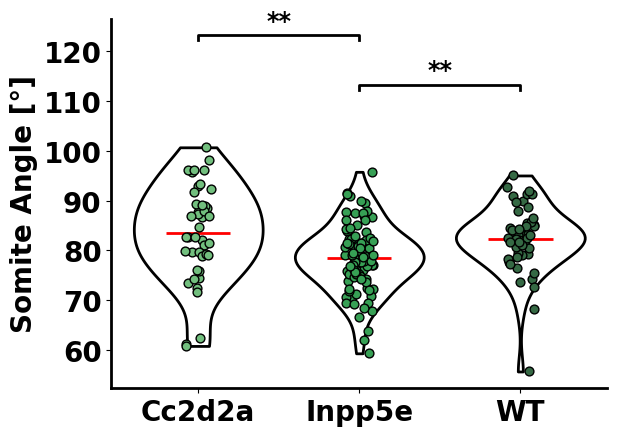

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Somite Angle [°]'>)

In [10]:
df = angles
x_group = "genotype"
y_variable = "angle"
violin_width = 0.8
y_label = r'Somite Angle [°]'

violinplot_delice(df,x_group,y_variable,violin_width=violin_width,y_label=y_label,palette="Greens_d",point_size=40,jitter=0.09,title="",title_size = 50)

#violin.savefig("/Users/quillan/Documents/Lab/Thesis/Thesis_2024/Spinal muscle stainings/Figures/F01-004-Somites-Angles.pdf", bbox_inches='tight')